# 第5章: グラフ生成器

## 学習目標
- 古典的グラフの生成方法を習得する
- ランダムグラフの生成を学ぶ
- ソーシャルネットワークモデルを理解する
- 実用的なグラフ生成器を活用する

## 難易度: 中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
%matplotlib inline

---
## 5.1 古典的グラフ

### 5.1.1 完全グラフ（Complete Graph）

すべてのノード間にエッジが存在するグラフ。$K_n$ と表記。

/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/637336119.py:10: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(

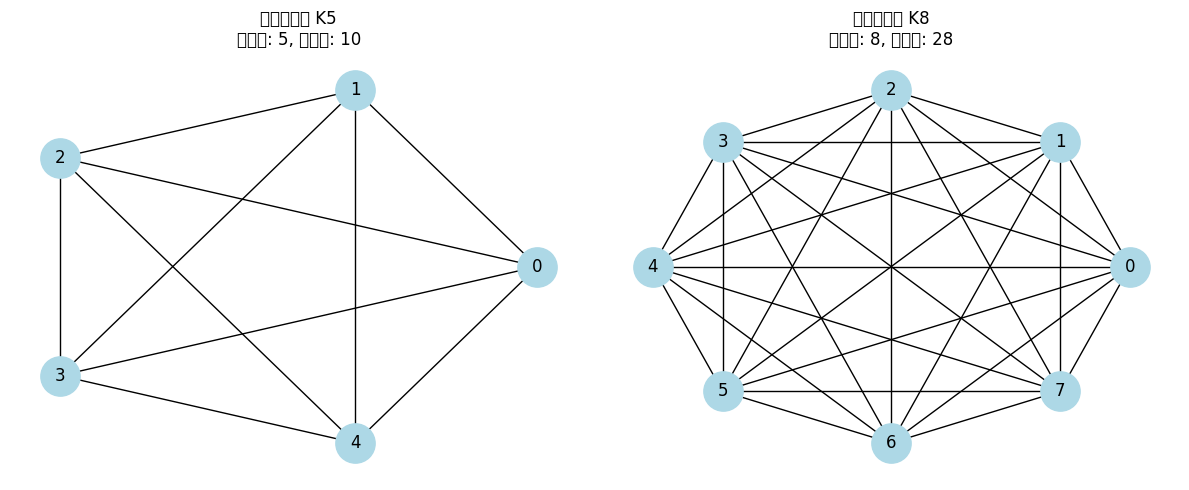

In [2]:
# 完全グラフ K5 と K8
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, n in zip(axes, [5, 8]):
    K = nx.complete_graph(n)
    pos = nx.circular_layout(K)
    nx.draw(K, pos, ax=ax, with_labels=True, node_color='lightblue', node_size=800)
    ax.set_title(f"完全グラフ K{n}\nノード: {K.number_of_nodes()}, エッジ: {K.number_of_edges()}")

plt.tight_layout()
plt.show()

In [3]:
# 完全グラフのエッジ数の公式: n(n-1)/2
for n in range(3, 11):
    K = nx.complete_graph(n)
    expected = n * (n - 1) // 2
    print(f"K{n}: エッジ数 = {K.number_of_edges()} (公式: {expected})")

K3: エッジ数 = 3 (公式: 3)
K4: エッジ数 = 6 (公式: 6)
K5: エッジ数 = 10 (公式: 10)
K6: エッジ数 = 15 (公式: 15)
K7: エッジ数 = 21 (公式: 21)
K8: エッジ数 = 28 (公式: 28)
K9: エッジ数 = 36 (公式: 36)
K10: エッジ数 = 45 (公式: 45)


### 5.1.2 パスグラフ（Path Graph）

ノードが一直線に並んだグラフ。

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


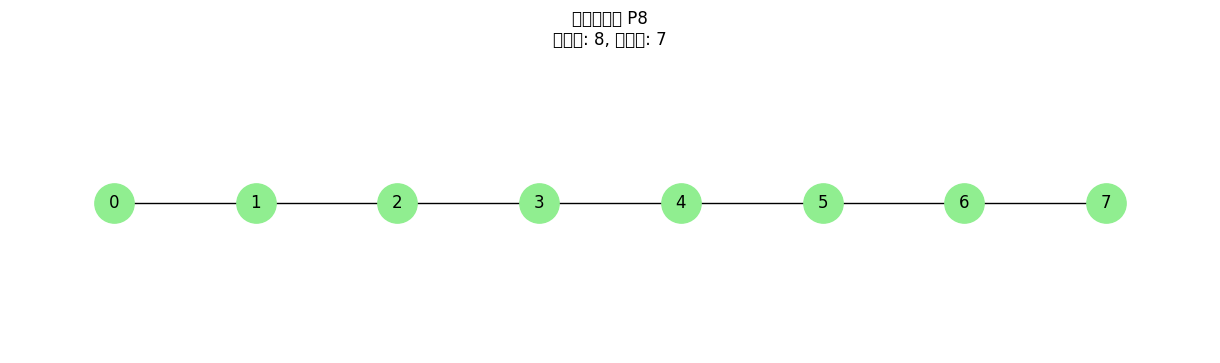

In [4]:
# パスグラフ
P = nx.path_graph(8)

plt.figure(figsize=(12, 3))
pos = {i: (i, 0) for i in P.nodes()}
nx.draw(P, pos, with_labels=True, node_color='lightgreen', node_size=800)
plt.title(f"パスグラフ P8\nノード: {P.number_of_nodes()}, エッジ: {P.number_of_edges()}")
plt.show()

### 5.1.3 サイクルグラフ（Cycle Graph）

輪の形をしたグラフ。

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


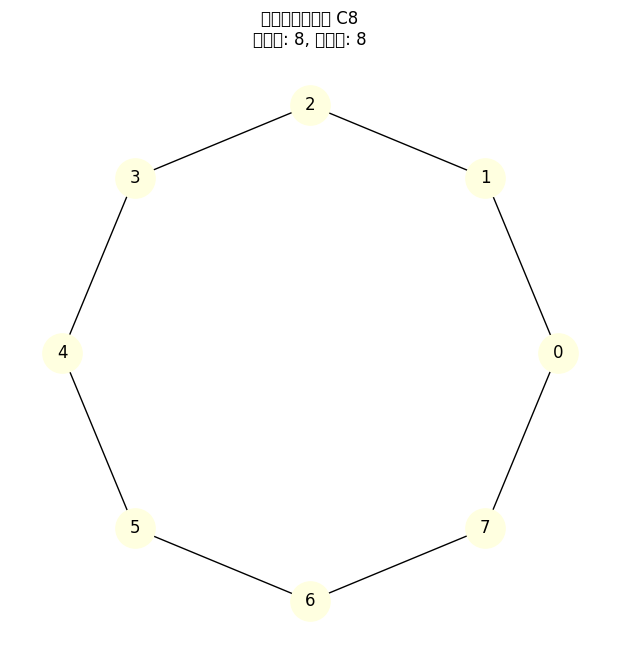

In [5]:
# サイクルグラフ
C = nx.cycle_graph(8)

plt.figure(figsize=(6, 6))
pos = nx.circular_layout(C)
nx.draw(C, pos, with_labels=True, node_color='lightyellow', node_size=800)
plt.title(f"サイクルグラフ C8\nノード: {C.number_of_nodes()}, エッジ: {C.number_of_edges()}")
plt.show()

### 5.1.4 スターグラフ（Star Graph）

中心ノードと周辺ノードからなるグラフ。

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


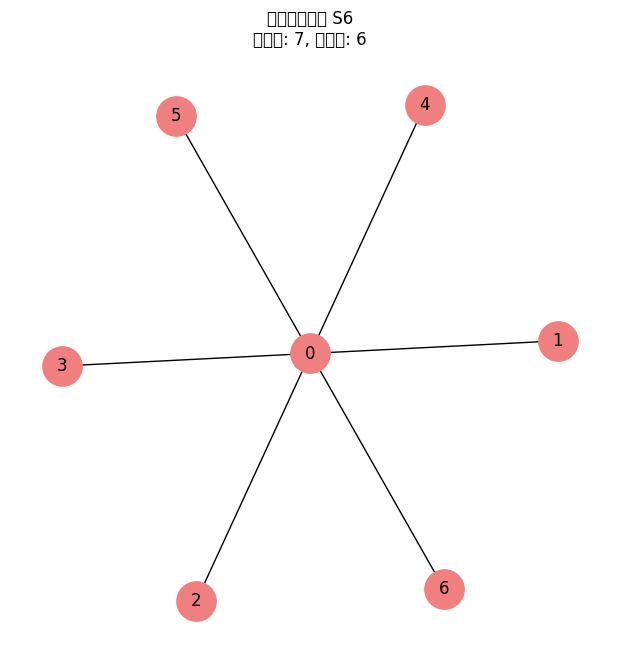

In [6]:
# スターグラフ
S = nx.star_graph(6)  # 中心1 + 周辺6 = 7ノード

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(S, seed=42)
nx.draw(S, pos, with_labels=True, node_color='lightcoral', node_size=800)
plt.title(f"スターグラフ S6\nノード: {S.number_of_nodes()}, エッジ: {S.number_of_edges()}")
plt.show()

### 5.1.5 ホイールグラフ（Wheel Graph）

サイクルグラフに中心ノードを追加したグラフ。

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12507 (\N{KATAKANA LETTER HO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


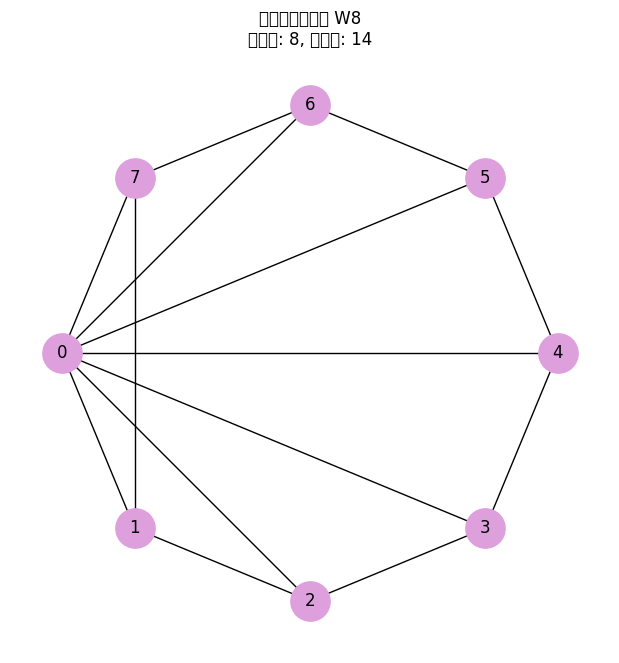

In [7]:
# ホイールグラフ
W = nx.wheel_graph(8)  # 中心1 + 周辺7 = 8ノード

plt.figure(figsize=(6, 6))
pos = nx.shell_layout(W)
nx.draw(W, pos, with_labels=True, node_color='plum', node_size=800)
plt.title(f"ホイールグラフ W8\nノード: {W.number_of_nodes()}, エッジ: {W.number_of_edges()}")
plt.show()

### 5.1.6 格子グラフ（Grid Graph）

2次元格子状のグラフ。

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


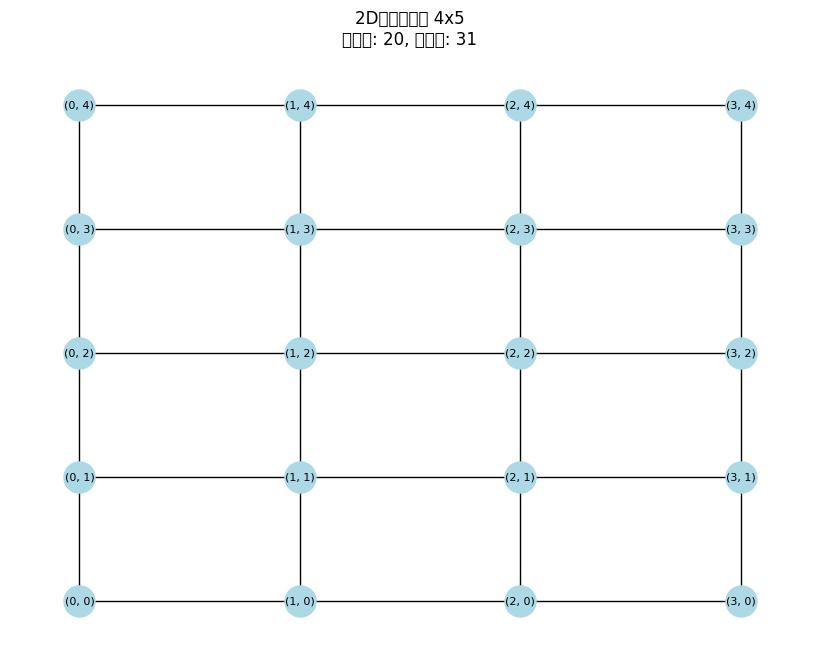

In [8]:
# 2次元格子グラフ
G = nx.grid_2d_graph(4, 5)

plt.figure(figsize=(8, 6))
pos = {(x, y): (x, y) for x, y in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
plt.title(f"2D格子グラフ 4x5\nノード: {G.number_of_nodes()}, エッジ: {G.number_of_edges()}")
plt.show()

### 5.1.7 完全二部グラフ（Complete Bipartite Graph）

2つのグループがあり、異なるグループ間のみエッジがあるグラフ。

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


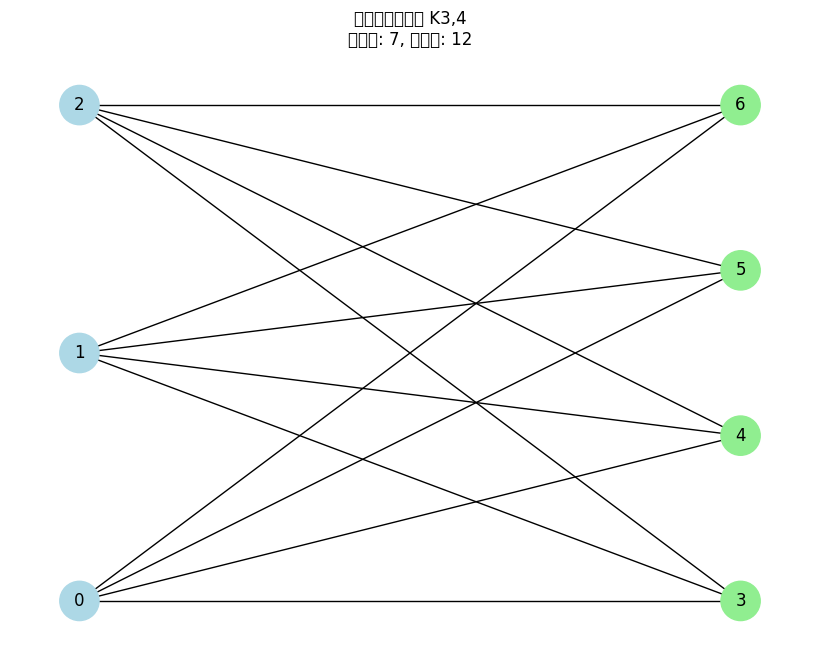

In [9]:
# 完全二部グラフ K3,4
B = nx.complete_bipartite_graph(3, 4)

plt.figure(figsize=(8, 6))
pos = nx.bipartite_layout(B, nodes=range(3))

# ノードの色を分ける
colors = ['lightblue'] * 3 + ['lightgreen'] * 4

nx.draw(B, pos, with_labels=True, node_color=colors, node_size=800)
plt.title(f"完全二部グラフ K3,4\nノード: {B.number_of_nodes()}, エッジ: {B.number_of_edges()}")
plt.show()

---
## 5.2 ランダムグラフ

### 5.2.1 Erdős–Rényi（エルデシュ・レーニィ）モデル

各エッジが確率 $p$ で独立に存在するランダムグラフ。

/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3849580815.py:12: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/cor

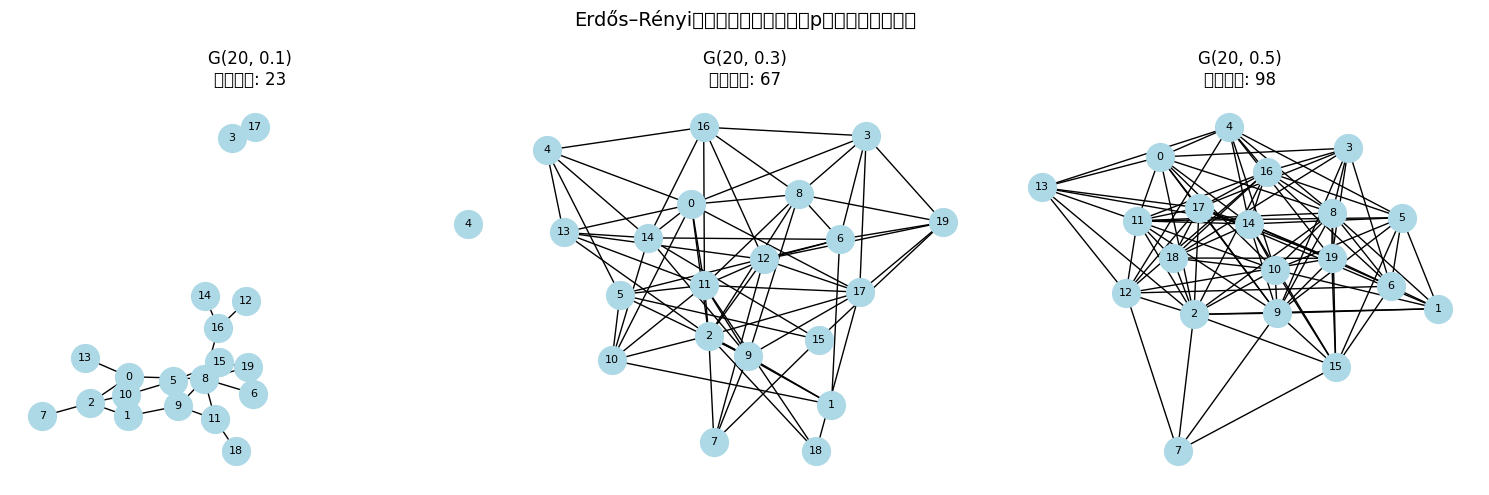

In [10]:
# Erdős–Rényi モデル G(n, p)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

n = 20
for ax, p in zip(axes, [0.1, 0.3, 0.5]):
    G = nx.erdos_renyi_graph(n, p, seed=42)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', node_size=400, font_size=8)
    ax.set_title(f"G({n}, {p})\nエッジ数: {G.number_of_edges()}")

plt.suptitle("Erdős–Rényiランダムグラフ（確率pでエッジが存在）", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
# エッジ数を指定するバージョン G(n, m)
G = nx.gnm_random_graph(20, 30, seed=42)
print(f"G(20, 30): ノード数={G.number_of_nodes()}, エッジ数={G.number_of_edges()}")

G(20, 30): ノード数=20, エッジ数=30


### 5.2.2 Barabási–Albert（バラバシ・アルバート）モデル

**スケールフリーネットワーク**を生成。新しいノードは既存の高次数ノードに接続しやすい（優先的選択）。

/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/426792559.py:19: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaV

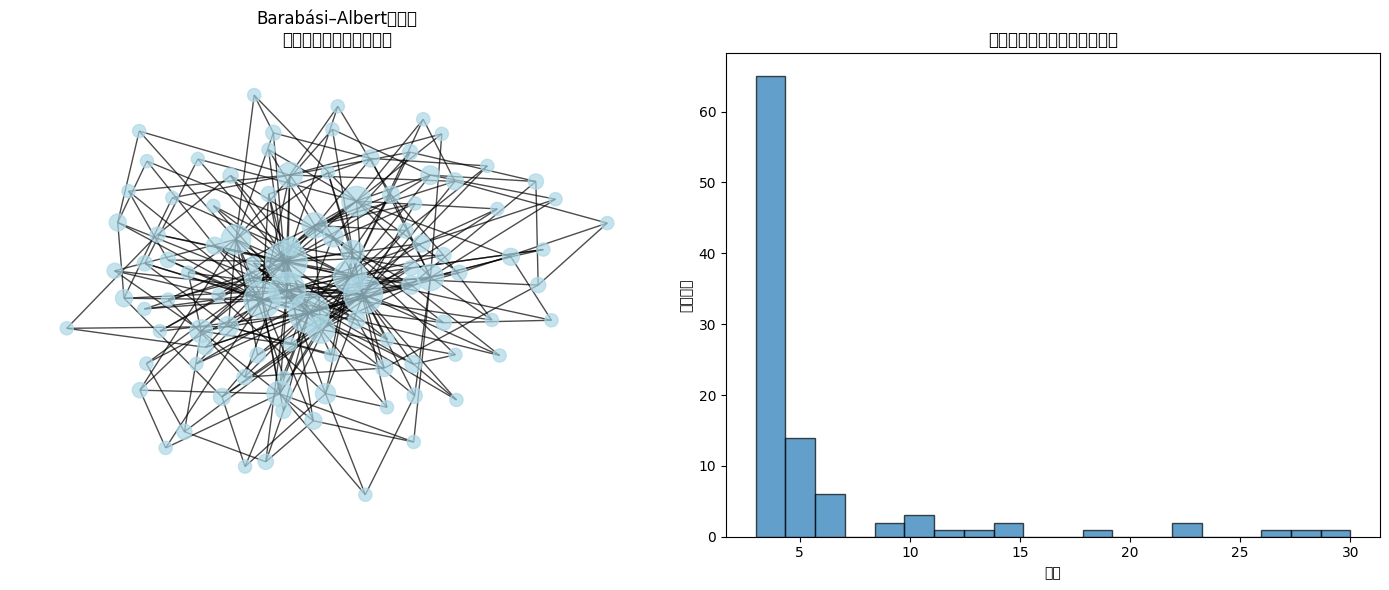

In [12]:
# Barabási–Albert モデル
BA = nx.barabasi_albert_graph(100, 3, seed=42)  # 100ノード、新ノードは3本のエッジ

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# グラフ構造
pos = nx.spring_layout(BA, seed=42)
node_sizes = [v * 30 for v in dict(BA.degree()).values()]
nx.draw(BA, pos, ax=axes[0], node_size=node_sizes, node_color='lightblue', alpha=0.7)
axes[0].set_title("Barabási–Albertグラフ\n（ノードサイズ＝次数）")

# 次数分布
degrees = [d for n, d in BA.degree()]
axes[1].hist(degrees, bins=20, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('次数')
axes[1].set_ylabel('ノード数')
axes[1].set_title('次数分布（べき乗則に従う）')

plt.tight_layout()
plt.show()

### 5.2.3 Watts–Strogatz（ワッツ・ストロガッツ）モデル

**スモールワールドネットワーク**を生成。高いクラスタリング係数と短い平均経路長。

/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_la

/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12527 (\N{KATAKANA LETTER WA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/4029264581.py:21: UserWarning: Glyph 35215 (\N{CJK UNIFIED IDEOGRAPH-898F}) missing from font(s

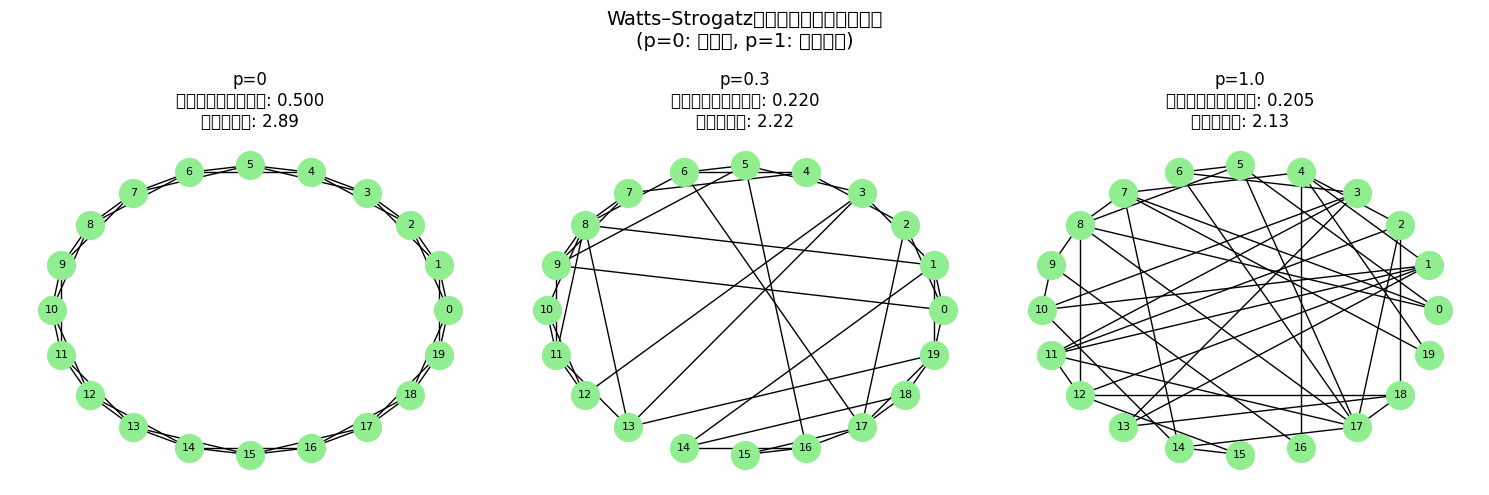

In [13]:
# Watts–Strogatz モデル
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

n, k = 20, 4  # 20ノード、各ノードは最近傍4ノードに接続

for ax, p in zip(axes, [0, 0.3, 1.0]):
    WS = nx.watts_strogatz_graph(n, k, p, seed=42)
    pos = nx.circular_layout(WS)
    nx.draw(WS, pos, ax=ax, with_labels=True, node_color='lightgreen', node_size=400, font_size=8)
    
    # 統計量
    clustering = nx.average_clustering(WS)
    if nx.is_connected(WS):
        avg_path = nx.average_shortest_path_length(WS)
    else:
        avg_path = float('inf')
    
    ax.set_title(f"p={p}\nクラスタリング係数: {clustering:.3f}\n平均経路長: {avg_path:.2f}")

plt.suptitle("Watts–Strogatzスモールワールドモデル\n(p=0: 規則的, p=1: ランダム)", fontsize=14)
plt.tight_layout()
plt.show()

---
## 5.3 有名なグラフ

/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12502 (\N{KATAKANA LETTER BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu San

/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12504 (\N{KATAKANA LETTER HE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12517 (\N{KATAKANA LETTER SMALL YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/3836523521.py:17: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from font(s) DejaVu Sans.
  plt.t

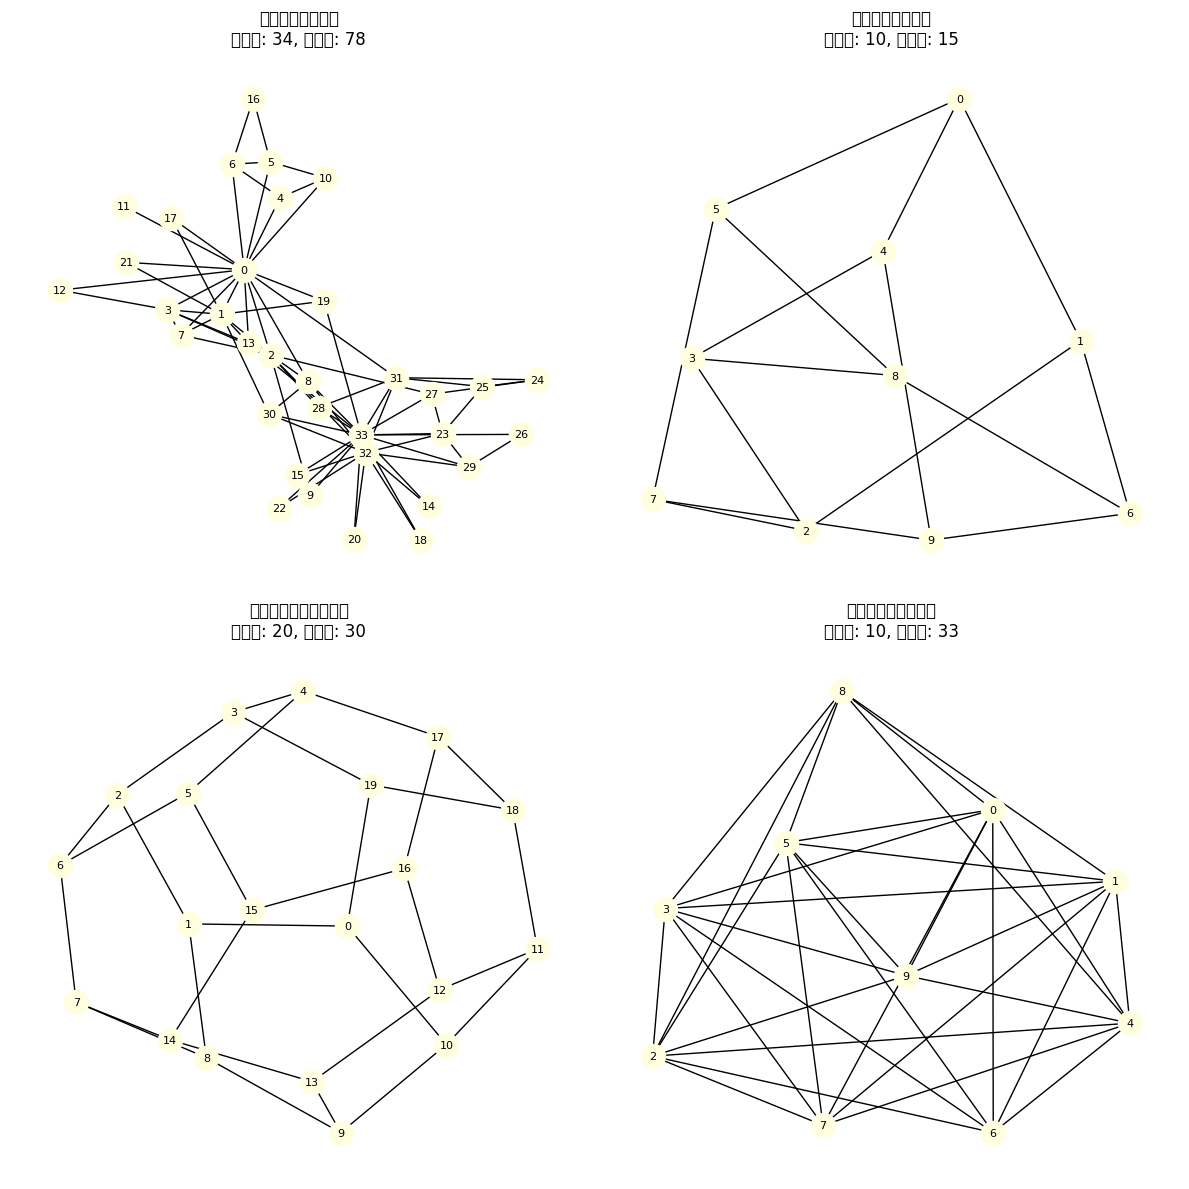

In [14]:
# 有名なグラフの比較
famous_graphs = {
    "空手クラブ": nx.karate_club_graph(),
    "ペテルセン": nx.petersen_graph(),
    "ドデカヘドロン": nx.dodecahedral_graph(),
    "チューリング": nx.turan_graph(10, 3)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (name, G) in zip(axes.flatten(), famous_graphs.items()):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightyellow', 
            node_size=300, font_size=8)
    ax.set_title(f"{name}グラフ\nノード: {G.number_of_nodes()}, エッジ: {G.number_of_edges()}")

plt.tight_layout()
plt.show()

---
## 5.4 ソーシャルネットワーク生成

/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


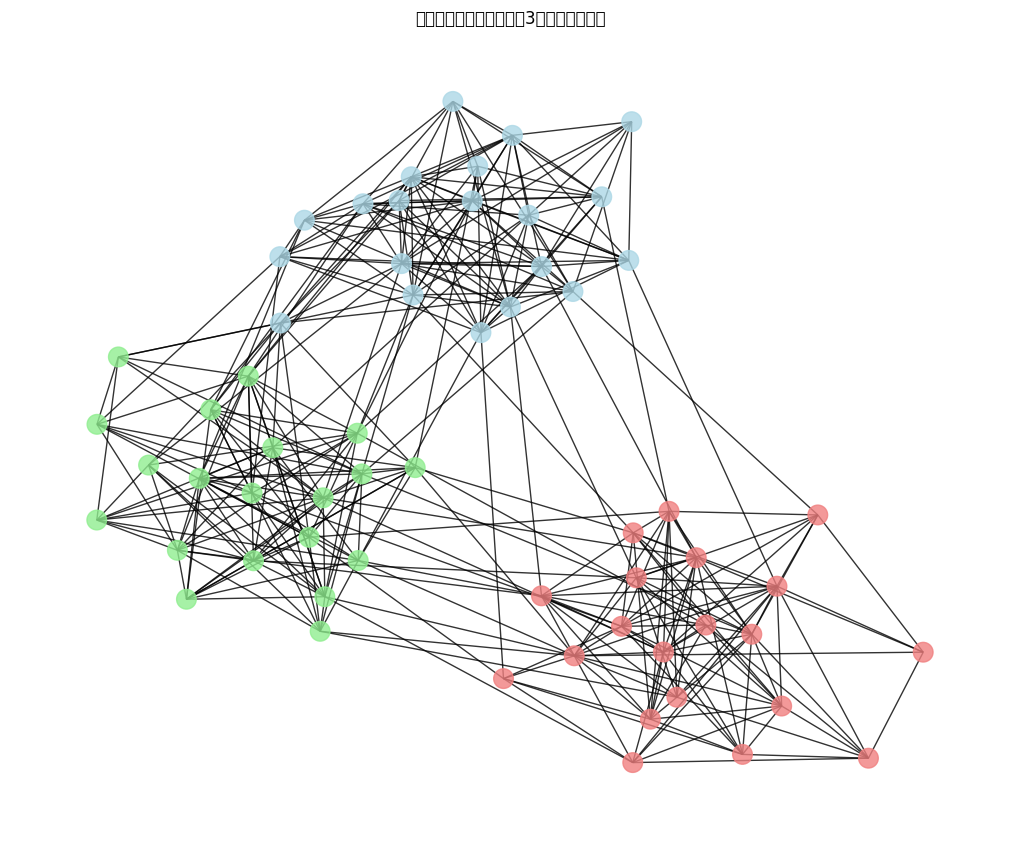

In [15]:
# Stochastic Block Model（確率的ブロックモデル）
# コミュニティ構造を持つグラフを生成

sizes = [20, 20, 20]  # 3つのコミュニティ、各20ノード
p_matrix = [
    [0.5, 0.05, 0.02],   # コミュニティ内は50%、他は低確率
    [0.05, 0.5, 0.05],
    [0.02, 0.05, 0.5]
]

SBM = nx.stochastic_block_model(sizes, p_matrix, seed=42)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(SBM, seed=42)

# コミュニティで色分け
colors = []
for node in SBM.nodes():
    block = SBM.nodes[node]['block']
    colors.append(['lightblue', 'lightgreen', 'lightcoral'][block])

nx.draw(SBM, pos, node_color=colors, node_size=200, alpha=0.8)
plt.title("確率的ブロックモデル（3コミュニティ）")
plt.show()

---
## 例題1: ネットワークモデルの比較

In [16]:
# 3つのモデルを比較
n = 100

models = {
    "Erdős–Rényi": nx.erdos_renyi_graph(n, 0.1, seed=42),
    "Barabási–Albert": nx.barabasi_albert_graph(n, 5, seed=42),
    "Watts–Strogatz": nx.watts_strogatz_graph(n, 10, 0.3, seed=42)
}

print("=== ネットワークモデルの比較 ===")
print(f"{'モデル':<20} {'ノード':>8} {'エッジ':>8} {'平均次数':>10} {'クラスタ係数':>12} {'平均経路長':>10}")
print("-" * 70)

for name, G in models.items():
    avg_degree = sum(dict(G.degree()).values()) / n
    clustering = nx.average_clustering(G)
    
    if nx.is_connected(G):
        avg_path = nx.average_shortest_path_length(G)
    else:
        # 最大連結成分で計算
        largest_cc = max(nx.connected_components(G), key=len)
        subG = G.subgraph(largest_cc)
        avg_path = nx.average_shortest_path_length(subG)
    
    print(f"{name:<20} {G.number_of_nodes():>8} {G.number_of_edges():>8} {avg_degree:>10.2f} {clustering:>12.4f} {avg_path:>10.2f}")

=== ネットワークモデルの比較 ===
モデル                       ノード      エッジ       平均次数       クラスタ係数      平均経路長
----------------------------------------------------------------------
Erdős–Rényi               100      474       9.48       0.0878       2.27
Barabási–Albert           100      475       9.50       0.2125       2.17
Watts–Strogatz            100      500      10.00       0.2516       2.35


/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10100/1939709760.py:12: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-57

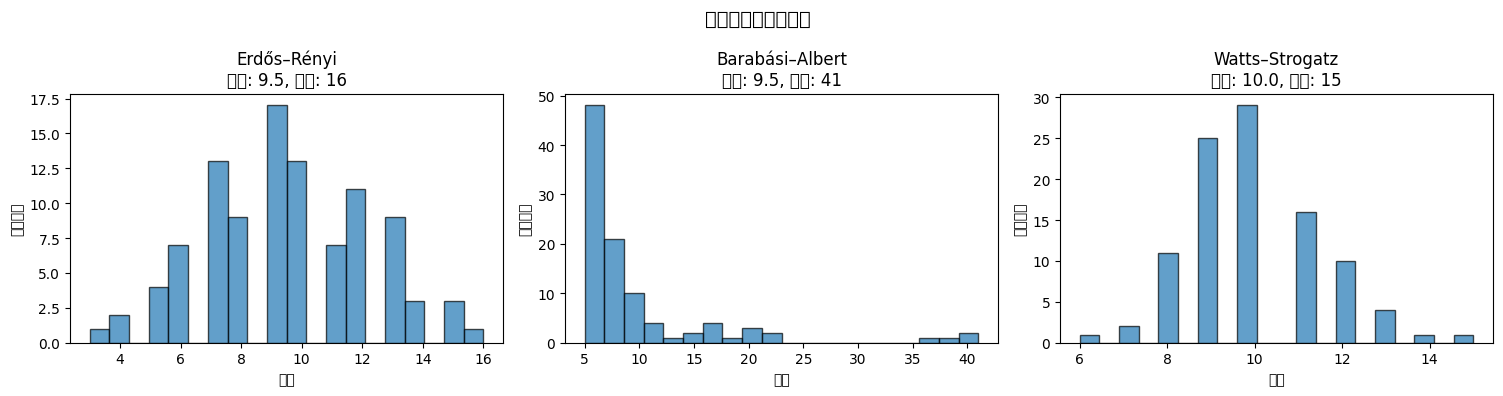

In [17]:
# 次数分布の比較
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, G) in zip(axes, models.items()):
    degrees = [d for n, d in G.degree()]
    ax.hist(degrees, bins=20, edgecolor='black', alpha=0.7)
    ax.set_xlabel('次数')
    ax.set_ylabel('ノード数')
    ax.set_title(f'{name}\n平均: {np.mean(degrees):.1f}, 最大: {max(degrees)}')

plt.suptitle('各モデルの次数分布', fontsize=14)
plt.tight_layout()
plt.show()

---
## 例題2: ツリー構造の生成

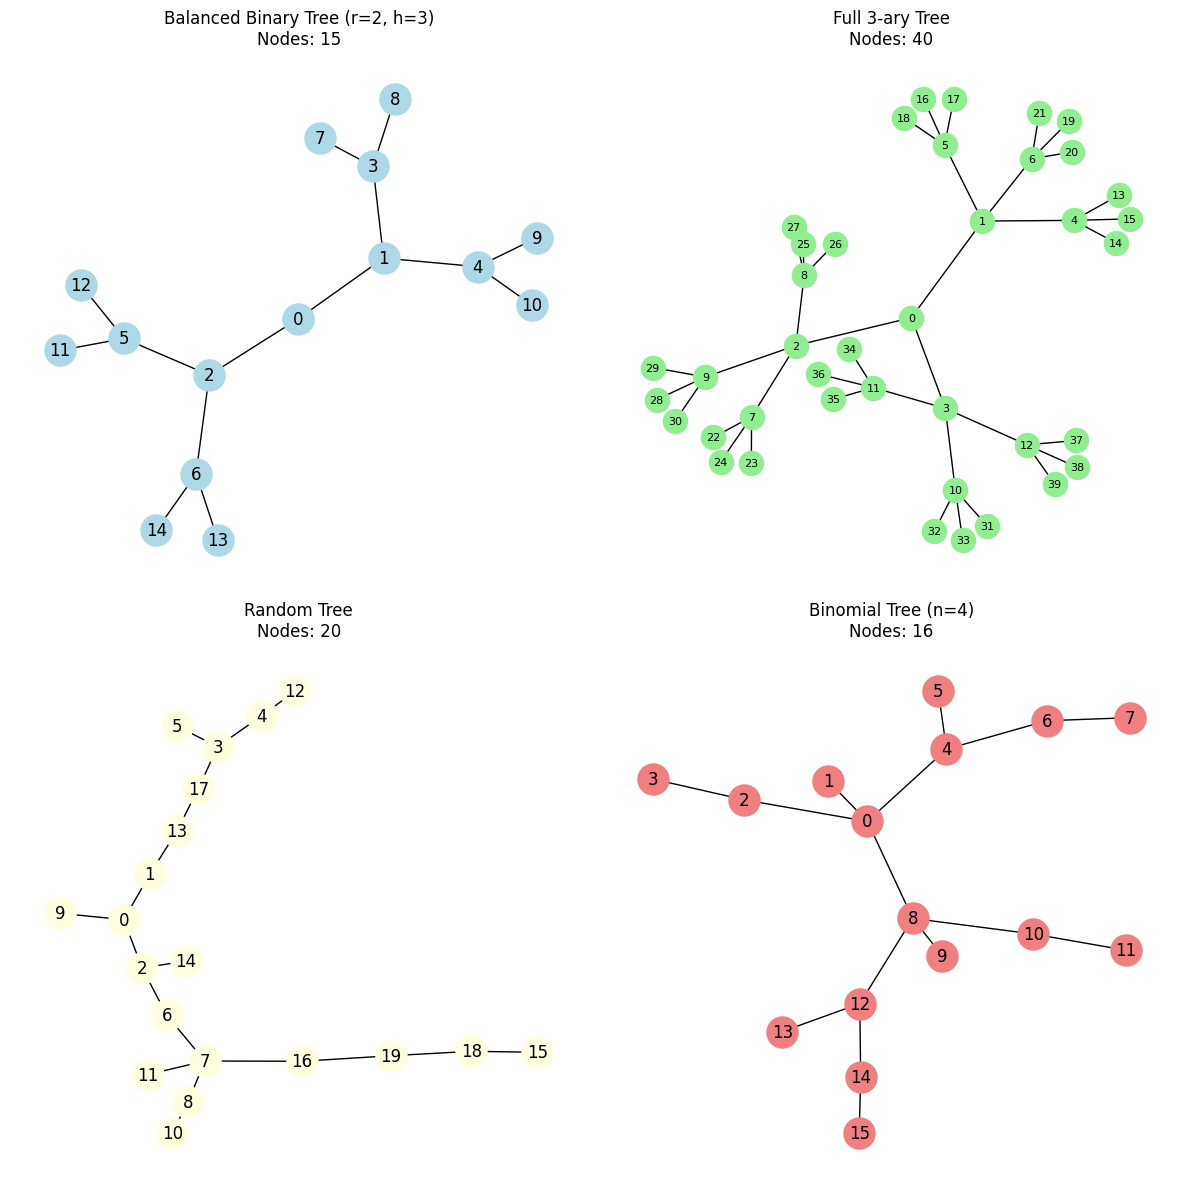

In [18]:
# 様々なツリー構造
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# バランス木
balanced = nx.balanced_tree(r=2, h=3)  # 分岐数2、高さ3
pos = nx.spring_layout(balanced, seed=42)
nx.draw(balanced, pos, ax=axes[0, 0], with_labels=True, node_color='lightblue', node_size=500)
axes[0, 0].set_title(f"Balanced Binary Tree (r=2, h=3)\nNodes: {balanced.number_of_nodes()}")

# 完全k-ary木
full = nx.full_rary_tree(3, 40)  # 3分木、40ノード
pos = nx.spring_layout(full, seed=42)
nx.draw(full, pos, ax=axes[0, 1], with_labels=True, node_color='lightgreen', node_size=300, font_size=8)
axes[0, 1].set_title(f"Full 3-ary Tree\nNodes: {full.number_of_nodes()}")

# ランダム木
random_tree = nx.random_labeled_tree(20, seed=42)
pos = nx.spring_layout(random_tree, seed=42)
nx.draw(random_tree, pos, ax=axes[1, 0], with_labels=True, node_color='lightyellow', node_size=500)
axes[1, 0].set_title(f"Random Tree\nNodes: {random_tree.number_of_nodes()}")

# 二項木
binomial = nx.binomial_tree(4)  # 次数4
pos = nx.spring_layout(binomial, seed=42)
nx.draw(binomial, pos, ax=axes[1, 1], with_labels=True, node_color='lightcoral', node_size=500)
axes[1, 1].set_title(f"Binomial Tree (n=4)\nNodes: {binomial.number_of_nodes()}")

plt.tight_layout()
plt.show()

---
## 練習問題

### 練習問題1: グラフ生成と特性分析

以下の3つのグラフを生成し、それぞれの特性を比較してください。

1. 50ノードの完全グラフ（K50）
2. 50ノードのサイクルグラフ（C50）
3. 50ノードのスターグラフ（S49）

比較項目:
- エッジ数
- 平均次数
- 直径（最長の最短経路）
- クラスタリング係数

In [19]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
graphs = {
    "完全グラフ K50": nx.complete_graph(50),
    "サイクルグラフ C50": nx.cycle_graph(50),
    "スターグラフ S49": nx.star_graph(49)  # 中心1 + 周辺49 = 50ノード
}

print("=== グラフ特性の比較 ===")
print(f"{'グラフ':<20} {'エッジ数':>10} {'平均次数':>10} {'直径':>8} {'クラスタ係数':>12}")
print("-" * 65)

for name, G in graphs.items():
    edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
    diameter = nx.diameter(G)
    clustering = nx.average_clustering(G)
    
    print(f"{name:<20} {edges:>10} {avg_degree:>10.2f} {diameter:>8} {clustering:>12.4f}")

# 可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, G) in zip(axes, graphs.items()):
    if "完全" in name:
        pos = nx.circular_layout(G)
    elif "サイクル" in name:
        pos = nx.circular_layout(G)
    else:
        pos = nx.spring_layout(G, seed=42)
    
    nx.draw(G, pos, ax=ax, node_size=50, node_color='lightblue', alpha=0.7)
    ax.set_title(name)

plt.tight_layout()
plt.show()
```
</details>

### 練習問題2: スケールフリーネットワークの検証

Barabási–Albertモデルで生成したグラフの次数分布がべき乗則に従うことを確認してください。

1. 1000ノードのBA グラフを生成（m=3）
2. 次数分布をヒストグラムで表示
3. 両対数グラフで次数分布をプロット
4. 上位10ノードの次数を表示

In [20]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# 1. BAグラフの生成
BA = nx.barabasi_albert_graph(1000, 3, seed=42)
print(f"ノード数: {BA.number_of_nodes()}, エッジ数: {BA.number_of_edges()}")

# 次数を取得
degrees = dict(BA.degree())
degree_values = list(degrees.values())

# 2. & 3. 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ヒストグラム
axes[0].hist(degree_values, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('次数')
axes[0].set_ylabel('ノード数')
axes[0].set_title('次数分布（ヒストグラム）')

# 両対数グラフ
from collections import Counter
degree_count = Counter(degree_values)
deg = list(degree_count.keys())
cnt = list(degree_count.values())

axes[1].loglog(deg, cnt, 'o', markersize=5)
axes[1].set_xlabel('次数 (log)')
axes[1].set_ylabel('頻度 (log)')
axes[1].set_title('次数分布（両対数グラフ）\nべき乗則: 直線的に見える')
axes[1].grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 上位10ノード
print("\n=== 次数上位10ノード ===")
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (node, deg) in enumerate(top_nodes, 1):
    print(f"  {rank}位: ノード{node} (次数: {deg})")
```
</details>

### 練習問題3: カスタムグラフ生成

以下の条件を満たすカスタムグラフを生成する関数を作成してください。

仕様:
- n個のノードを持つ
- 各ノードはランダムに選ばれた他の2〜5個のノードと接続
- 自己ループなし
- 重複エッジなし（無向グラフ）

```python
def create_custom_graph(n, min_edges=2, max_edges=5, seed=None):
    # 実装してください
    pass
```

In [21]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
import random

def create_custom_graph(n, min_edges=2, max_edges=5, seed=None):
    """
    カスタムランダムグラフを生成
    
    Parameters:
    -----------
    n : int
        ノード数
    min_edges : int
        各ノードの最小エッジ数
    max_edges : int
        各ノードの最大エッジ数
    seed : int, optional
        乱数シード
    
    Returns:
    --------
    nx.Graph
        生成されたグラフ
    """
    if seed is not None:
        random.seed(seed)
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    for node in range(n):
        # 接続するエッジ数を決定
        num_edges = random.randint(min_edges, max_edges)
        
        # 候補ノード（自分以外）
        candidates = [i for i in range(n) if i != node]
        
        # ランダムに選択
        targets = random.sample(candidates, min(num_edges, len(candidates)))
        
        for target in targets:
            G.add_edge(node, target)
    
    return G

# テスト
G = create_custom_graph(30, min_edges=2, max_edges=5, seed=42)

print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")
print(f"平均次数: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"最小次数: {min(dict(G.degree()).values())}")
print(f"最大次数: {max(dict(G.degree()).values())}")

# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=10)
plt.title("カスタムランダムグラフ")
plt.show()
```
</details>

---
## 5.5 章のまとめ

この章では以下を学びました：

1. **古典的グラフ**: 完全グラフ、パス、サイクル、スター、ホイール、格子、二部グラフ
2. **ランダムグラフモデル**:
   - **Erdős–Rényi**: 確率的にエッジが存在
   - **Barabási–Albert**: スケールフリー（べき乗則）
   - **Watts–Strogatz**: スモールワールド
3. **有名なグラフ**: 空手クラブ、ペテルセンなど
4. **ツリー構造**: バランス木、ランダム木など

### 次章の予告
次章では、生成したグラフを分析するための基本的な手法を学びます。